# How Different Factors Affect Projectile Motion

RJ Okonowski & Josh Harris

## Table of Contents

* [Introduction](#intro)
* [Model](#model)
* [Numerical Methods](#num)
* [Results](#res)
* [Analysis](#anal)
* [Summary](#sum)
* [References](#ref)


## Introduction <a id='intro'></a>

Projectile motion is how physicists describe two-dimensional motion; it is a form of motion experienced by an object that is thrown or hit near the Earth's surface and moves along a curved path, known as a parabola. Other than the launch force, which creates the initial velocity the object will have, the only force acting on the projectile is the gravitational force, which can be described as $g = 9.8 m/s^{2}$. In the case of the simple projectile motion model of a single downard acceleration, the path of the projectile will take the shape of a parabola, which will have both a horizontal and vertical component. When this simple case is not true, the path will not be a parabola. There are many different factors that can affect the projectile motion of an object, such as: the launch angle, the launch force, the air drag, and the elevation. 

The initial angle and launch force can affect many behaviors of a projectile, including the maximum height, the horizontal distance traveled, and the initial velocity of the projectile. Changing these factors can cause the time of flight and range of the projectile to differ with each launch. Air drag is the force of air resistance pushing in the opposite direction to the motion of the object. Thisw force can be either positive or negative, depending on whether the wind creates a headwind or tailwind. These factors are very important when trying to create a realistic model of a projectile object moving through the air, since air drag has a very large affect on the projectile motion of an object. Another factor that can change the outcome of projectile motion is the elevation, due to the changes in air density. As the elevation increases, the air density will decrease, causing a different air resistance that will change the behaviors of the projectile object. 

![xkcd](Drag.jpg)

#### Figure 1
In projectile motion, the velocity has a component in both the x and y directions. The air drag force also has x and y components in the opposing direction of the velocity.

## Model  <a id='model'></a>

The equations that were used to model the projectile motion:

* The equations of motion, ignoring air resistance, obtained from Newton's second law:
<center>$\frac{d^{2}x}{dt^{2}} = 0$   ,   $\frac{d^{2}y}{dt^{2}} = -g$</center>

* Each of the above second-order differential equation as two first-order differential equations: 
<center>$\frac{dx}{dt} = v_{x}$   ,   $\frac{dv_{x}}{dt} = 0$   ,   $\frac{dy}{dt} = v_{y}$   ,   $\frac{dv_{y}}{dt} = -g$</center>

* Force due to air drag:
<center>$F_{d} = \frac{C_{d}\rho Av^{2}}{2}$</center> 

* Changes in air density due to changes in elevation:
<center>$\rho = \rho_{0}e^{-\frac{y}{y_{0}}}$</center>

Where:

$x$ is the horizontal coordinates of the projectile

$y$ is the vertical coordinates of the projectile

$v_{x}$ is the x component of the velocity

$v_{y}$ is the y component of the velocity

$t$ is the time elapsed

$g$ is the acceleration due to gravity

$F_{d}$ is the drag force due to air resistance

$C_{d}$ is the drag coefficient

$\rho$ is the air density

$A$ is the cross sectional area of the projectile

$v$ is the total velocity of the projectile

$\rho_{0}$ is the air density at sea level

$y_{0}$ is the altitude at sea level

There will be several simulations done for projectile motion, each with a different primary factor. The first simulation will be the projectile motion of an object without air drag, showing the simplest form of projectile motion. Then, air drag will be included and a new simuation will be run using the same constants as the previous simulation. The final simulation will include the effects of changing elevation, which will result in changing air densities. These simulations will give us a lot of information on projectile motion, with the final simulation being most like a realistic model.

**Boundary Conditions:** At t=0, the projectile must start at the position 0 in both the x and y direction. There is no limit on how the object can travel in the positive x and y directions; the only thing controlling this motion is the simulated forces. The projectile is not able to travel in the negative x and y positions.

## Numerical Methods <a id='num'></a>

We used the Euler Method to solve the differential equations of motion to see the behavior of each of these aspects of a projectile with respect to time. We also used the Euler Method in our projectile function to solve and obtain new values for the $x$ and $y$ positions, as well as the $x$ and $y$ velocities. For the  Euler Method, if we know the value of $x$ at time $t$, we can use the equation: $x(t + dt) = x(t) + dtf (x,t)$ to calculate the value a short time later. This formula can be modified to solve for $v_{x}$, $y$, and $v_{y}$ by replacing the variable $x$. This process is repeated to calculate our value another interval $dt$ after that, and so forth. This results in a calculation of our variable at a succession of evenly spaced points for whatever interval we choose. The limits of this method are due to the time it takes; in order to make it more accurate, we must increase the step size, $dt$, but when we increase the step size, the calculation will take longer.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab
import plotly.graph_objects as go

In [11]:
def solve(f,y0,interval,steps):
    """ Solve ODE by Euler method, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    
    #Calculates the size of a single step
    a = interval[0]
    b = interval[1]
    h = (b - a) / steps
    x = y0
    
    #Creates the arrays that will store the data
    tpoints = np.arange(a, b, h)
    xpoints = []
    
    #Loops for every point in tpoints
    for t in tpoints:
        #Euler's method
        xpoints.append(x)
        x += h * f(x, t)
        
    #Returns both arrays
    return (tpoints, xpoints)

In [12]:
def projectile(dt, v_init, theta, x, y, drag=False, A_m=0, elevation=False, p0=101325, y0=1e4):
    """
    Parameters:
        dt        - time step in s
        v_init    - initial velocity in m/s
        theta     - launch angle in radians
        x         - array of x values
        y         - array of y values
        drag      - boolean determining if drag force is to be calculated (optional)
        A_m       - coefficient used to calculate the drag force (optional)
        elevation - boolean determining if elevation is to be considered (optional)
        p0        - initial air density at sea level in Pa (optional)
        y0        - initial altitude in m (optional)
        
    Calculates the projectile motion of an object with the given parameters with or 
    without air drag.
    
    Returned:
        The x and y arrays containing the new values.
    """
    
    #Initializes the velocity at a specific launch angle
    vx = v_init * math.cos(theta)
    vy = v_init * math.sin(theta)
    nmax = len(x)
    
    #Loops for every element in x
    for i in range(1, nmax):
        #Uses Euler method to get the solution
        x[i] = x[i-1] + vx * dt
        y[i] = y[i-1] + vy * dt
            
        #Without air drag, only force of gravity in y direction    
        if drag == False:
            vy = vy - 9.8 * dt
            
        #With air drag, need drag force acting on both x and y
        else:
            #Calculates the drag force
            fd = A_m * math.sqrt(vx ** 2 + vy ** 2)
            
            #With the affects of elevation on air density
            if elevation == False:
                vy = vy - 9.8 * dt - fd * vy * dt
                vx = vx - fd *vx * dt
                
            #Without the affects of elevation on air density    
            else:
                #Calculates the changing air density
                p = p0 * (np.e **(-y[i] / y0))
                
                #Calculates the drag force
                f = (p / p0) * fd
                vy = vy - 9.8 * dt - f * vy * dt
                vx = vx - f *vx * dt
                
        #Checks if the projectile has reached the ground
        if y[i] <= 0:
            x[i] = x[i-1]
        
    #Returns the values to be plotted
    return x, y

## Results <a id='res'></a>

### Differential Equation Solutions

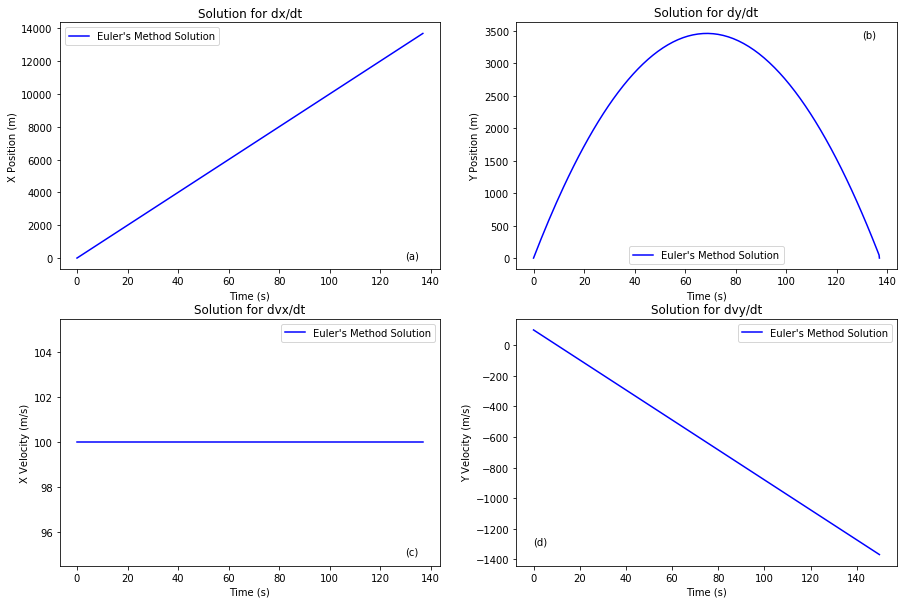

In [41]:
#Initialize the variables
x0 = 0
y0 = 0
vx0 = 100
vy0 = 100
g = 9.8 

#Function for dx/dt
def x(x, t):
    return vx0 

#Function for dvx/dt
def vx(v, t):
    return 0

#Function for dvy/dt
def vy(v, t):
    return -g

#Use our written solve function to solve for each differential equation
x1, y1 = solve(x, x0, (0,137), 1000)
x2, y2 = solve(vx, vx0, (0,137), 1000)
x4, y4 = solve(vy, vy0, (0,150), 1000)

#Function for dy/dt
def y(y, t):
    return y4[int(t)]

#Uses our writte function to solve for dy/dt
x3, y3 = solve(y, y0, (0,137), 1000)
y3[-1] = 0

#Creates the plot
fig,ax = plt.subplots(2,2,figsize=(15,10))

#Plots the data and sets the axes
ax[0,0].plot(x1, y1, "b", label="Euler's Method Solution")
ax[0,0].set_title("Solution for dx/dt")
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("X Position (m)")
ax[0,0].legend()
ax[1,0].plot(x2, y2, "b", label="Euler's Method Solution")
ax[1,0].set_title("Solution for dvx/dt")
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("X Velocity (m/s)")
ax[1,0].legend()
ax[0,1].plot(x3, y3, "b", label="Euler's Method Solution")
ax[0,1].set_title("Solution for dy/dt")
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Y Position (m)")
ax[0,1].legend()
ax[1,1].plot(x4, y4, "b", label="Euler's Method Solution")
ax[1,1].set_title("Solution for dvy/dt")
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Y Velocity (m/s)")
ax[1,1].legend()

#Labels each plot a,b,c,d
text1 = ax[0,0].annotate((r'(a)'), xy=(130, 0))
text2 = ax[0,1].annotate((r'(b)'), xy=(130, 3400))
text3 = ax[1,0].annotate((r'(c)'), xy=(130, 95))
text4 = ax[1,1].annotate((r'(d)'), xy=(0, -1300))

#### Figure 2
The above plots show the solution to the four differential eqautions for basic projectile motion and does not include air drag. The plot labeled $(a)$ shows the solution for $\frac{dx}{dt} = v_{x}$, the plot labeled $(b)$ shows the solution for $\frac{dy}{dt} = v_{y}$, the plot labeled $(c)$ shows the solution for $\frac{dv_{x}}{dt} = 0$, and the plot labeled $(d)$ shows the solution for $\frac{dv_{y}}{dt} = -g$. As we can see from these plots, the X Velocity will be constant and the X Position will be contantly increasing through the projectile's time of flight. We can see that the Y Position increases until the projectile is pulled back down due to the gravitational force, creating a parabola. These plots also show that Y Velocity will be constantly decreasing, as expected. However, I would've expected this to be positive for the first part, and cross the x axis somewhere in the middle when the object has reached the peak of the parabola. 

### Projectile Motion without Air Drag

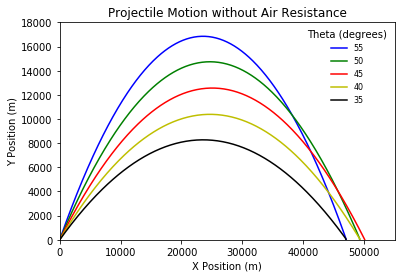

In [49]:
#Initialize the variables
dt = 0.25
v_init = 700
theta1 = (55 / 180) * math.pi
theta2 = (50 / 180) * math.pi
theta3 = (45 / 180) * math.pi
theta4 = (40 / 180) * math.pi
theta5 = (35 / 180) * math.pi

#Creates an x and y array for each different theta value
x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)
x5 = np.zeros(5000)
y5 = np.zeros(5000)

#Use our projectile function to find the projectile motion without drag for each case
x1, y1 = projectile(dt, v_init, theta1, x1, y1)
x2, y2 = projectile(dt, v_init, theta2, x2, y2)
x3, y3 = projectile(dt, v_init, theta3, x3, y3)
x4, y4 = projectile(dt, v_init, theta4, x4, y4)
x5, y5 = projectile(dt, v_init, theta5, x5, y5)
        
#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b", label="55")
ax.plot(x2, y2, "g", label="50")
ax.plot(x3, y3, "r", label="45")
ax.plot(x4, y4, "y", label="40")
ax.plot(x5, y5, "k", label="35")
ax.set_title("Projectile Motion without Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 18000)
ax.set_xlim(0, 55000)
ax.legend(title="Theta (degrees)",frameon=False, loc='upper right', prop={'size': 8})

#Shows the plot
plt.show()

#### Figure 3
The above plot shows the projectile motion of an object without air drag when launched at different angles. As we can see from this plot, the angle of 45 degrees (red line) travels the furthest distance in the x direction. The angles of 50 and 40 degrees (green and yellow lines, respectively) travel about the same distance, which is slightly less than that of 45 degrees. The angles of 55 and 35 degrees (blue and black lines, respectively) travel the smallest distance in the x direction. These results tell us that a launch angles of 45 degrees will maximize the distance the projectile will travel in the x direction. From this plot, we can also see that the larger the launch angles is, the further the object will travel in the y direction.

In [46]:
fig = go.Figure(data=[go.Table(header=dict(values=['Angle (Degrees)', 'Final X-displacement (meters)']),
                 cells=dict(values=[[55, 50, 45, 40, 35], [x1[-1], x2[-1], x3[-1], x4[-1], x5[-1]]]))
                     ])
fig.show()

#### Figure 4
The above table shows the final x positions of the object launched at different angles when air drag is ignored. These values confirm the results we obtained from the corresponding graph, which is that a launch angle of 45 degrees will cause the projectile to travel the furthest in the x direction.

### Projectile Motion with Air Drag

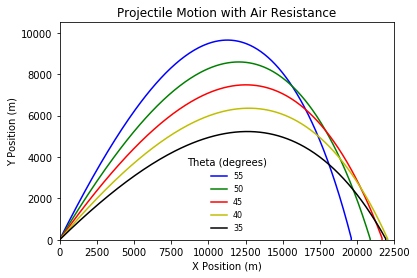

In [60]:
#Initialize the variables
t = 0.25
v_init = 700
theta1 = (55 / 180) * math.pi
theta2 = (50 / 180) * math.pi
theta3 = (45 / 180) * math.pi
theta4 = (40 / 180) * math.pi
theta5 = (35 / 180) * math.pi
A_m = 4e-5

#Create an x and y array for each different theta value
x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)
x5 = np.zeros(5000)
y5 = np.zeros(5000)

#Use our projectile function to find the projectile motion with drag for each case
x1, y1 = projectile(dt, v_init, theta1, x1, y1, True, A_m)
x2, y2 = projectile(dt, v_init, theta2, x2, y2, True, A_m)
x3, y3 = projectile(dt, v_init, theta3, x3, y3, True, A_m)
x4, y4 = projectile(dt, v_init, theta4, x4, y4, True, A_m)
x5, y5 = projectile(dt, v_init, theta5, x5, y5, True, A_m)

#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b", label="55")
ax.plot(x2, y2, "g", label="50")
ax.plot(x3, y3, "r", label="45")
ax.plot(x4, y4, "y", label="40")
ax.plot(x5, y5, "k", label="35")
ax.set_title("Projectile Motion with Air Resistance")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 10500)
ax.set_xlim(0, 22500)
ax.legend(title="Theta (degrees)", frameon=False, loc='lower center', prop={'size': 8})

#Shows the plot
plt.show()

#### Figure 5
The above plot shows the projectile motion of an object launched at different angles when we account for air drag. As we can see from the plot, the launch angle of 40 degrees (yellow line) causes the object to travel the furthest in the x direction. Then, the other four launch angles (from largest to smallest displacement in the x direction) are: 35 degrees (black line), 45 degrees (red line), 50 degrees (green line), and 55 degrees (blue line). So, these results tell us that a 40 degree launch angle will cause the projectile to travel the furthest in the x direction. Then, as our launch angle gets larger, the displacement in the x direction will decrease. This plot also shows us that the larger the launch angle, the further the object will travel in the y direction. Comparing this to our previous plot where we ignored air drag, we can see that air drag causes the projectile to travel a much smaller distance in both the x and y directions.  

In [41]:
fig = go.Figure(data=[go.Table(header=dict(values=['Angle (Degrees)', 'Final X-displacement (meters)']),
                 cells=dict(values=[[55, 50, 45, 40, 35], [x1[-1], x2[-1], x3[-1], x4[-1], x5[-1]]]))
                     ])
fig.show()

#### Figure 6
The above table shows the final x positions of the object launched at different angles when air drag is included. These values confirm the results we obtained from the corresponding graph, which is that a launch angle of 40 degrees will cause the projectile to travel the furthest in the x direction. It also confirms that a larger launch angle will result in the object traveling less distance in the x direction.

### Projectile Motion with Changing Air Density

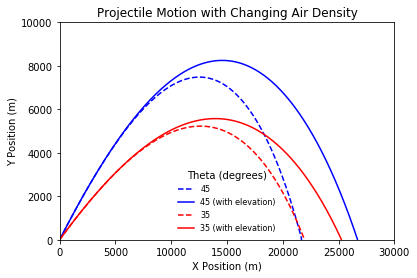

In [42]:
#Initialize the variables
dt = 0.25
v_init = 700
theta1 = (45 / 180) * math.pi
theta2 = (35 / 180) * math.pi
A_m = 4e-5

#Create an x and y array for each different case
x1 = np.zeros(5000)
y1 = np.zeros(5000)
x2 = np.zeros(5000)
y2 = np.zeros(5000)
x3 = np.zeros(5000)
y3 = np.zeros(5000)
x4 = np.zeros(5000)
y4 = np.zeros(5000)

#Use our projectile function to find the projectile motion with changing air density for each case
x1, y1 = projectile(dt, v_init, theta1, x1, y1, True, A_m)
x2, y2 = projectile(dt, v_init, theta1, x2, y2, True, A_m, True)
x3, y3 = projectile(dt, v_init, theta2, x3, y3, True, A_m)
x4, y4 = projectile(dt, v_init, theta2, x4, y4, True, A_m, True)

#Creates the plot
ax = plt.subplot(111)

#Plots the data and sets the axes
ax.plot(x1, y1, "b--", label="45")
ax.plot(x2, y2, "b", label="45 (with elevation)")
ax.plot(x3, y3, "r--", label="35")
ax.plot(x4, y4, "r", label="35 (with elevation)")
ax.set_title("Projectile Motion with Changing Air Density")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_ylim(0, 10000)
ax.set_xlim(0, 30000)
ax.legend(title="Theta (degrees)", frameon=False, loc='lower center', prop={'size': 8})

#Shows the plot
plt.show()

#### Figure 7
The above plot shows the projectile motion of an object when the effects of elevation are included. As the object travels higher in the y direction, the air density get smaller, causing a lower drag force. This ultimately changes the total projectile motion of the object since the air resistance will decrease as the elevation increases. As we can see from this plot, adding these affects of elevation result in the projectile traveling further in both the x and y positions. The blue lines show a launch angles of 45 degrees and the red lines show a launch angles of 35 degrees, while the dashed lines show the projectile motion with no chainging air density (constantly at an air density at sea level) and the solid lines shows the projectile motion with changing air densities. 

In [45]:
fig = go.Figure(data=[go.Table(header=dict(values=['Angle (Degrees)', 'Final X-displacement (meters)']),
                 cells=dict(values=[['45', '45 (with elevation)', '35', '35 (with elevation)'], 
                                    [x1[-1], x2[-1], x3[-1], x4[-1]]]))])
fig.show()

#### Figure 8
The above table shows the final x positions of the object with and without the effects of elevation. These values confirm the results we obtained from the corresponding graph. When the changes in elevation are accounted for, the ball travels further in both the x and y positions.

## Analysis <a id='anal'></a>

Before we could create the simulations for projectile motion, we first had to solve the differential equations for projectile motion. This gave us a better understanding of how the X Position, X Velocity, Y Position, and Y Velocity of the projectile would behave over time. The plots in Figure 2 show the solutions for the equations. As we can see from these plots, the X Velocity of the object will be constant, resulting in the X Position increasing at a constant rate. We can also see that Y Velocity of the object will be decreasing at a constant rate, resulting in the Y Position creating a parabolic shape, with a peak at the same point in time that the Y Velocity is zero. These results agreed with our previous knowledge of projectile motion. 

Once we had the solutions for our basic models, we simulated the basic projectile motion of an object without air drag. During this simulation, we varied the values of the launch angle and the initial velocity. The launch angle changed the angle that the projectile was launched with respect to the horizontal axis, which changed the path of the projectile. From our results, we found that an angle of 45 degrees will cause the object to travel the furthest in the x direction. We also found that a larger launch angle will result in the object traveling further in thd y direction. When the initial velocity was changed, the force initially applied on the projectile changed, causing it to follow a different path for each value. Each time, the shape of the path was the same, but the object traveled less distance in both directions when a smaller velocity was applied, and vice versa. These results agreed with our basic model for projectile motion.   

We then added air drag to our model to create a more realistic simulation. Other than the addition of air resistance, this simulation was run the same as the previous one. The same variables were changed and similar results were observed. When the launch angle increases, the object travels further in the y direction, as seen before. However, in this simulation, the angle that resulted in the largest displacement in the x direction was 40 degrees. Changing the initial velocity altered the projectile motion the same as before, where the shape remained constant and the distance traveled was changed. The addition of air resistance caused the projectile to travel a smaller distance in both directions, implying that our positive drag force caused a headwind. This was confirmed by changing the drag force to be negative and observing that this resulted in the object traveling a further distance, showing a tailwind. When the value of A_m was set to be zero, the results matched the results from the previous simulation, as expected, since this value being zero represents the absence of air drag.

The last simulation we ran was our most realistic model, which included the effects of changing air densities as elevation changes. In this simulation, we calculated a new air density at each instant in time using the projectile's current y position and used this new density to find the drag force. As the plots show, adding this change in air density caused the projectile to travel further in both directions. This is because as the object travels to higher altitudes, the air density decreases. In other words, the air becomes "thinner". This causes the air resistance to decrease, allowing the object to travel a further distance. The results are the same as the previous simulation for all parameters that were changed, since this is a very similar simulation. Our plot shows the launch angles of 35 and 45 degrees, but the other angles were also tested and confirmed to yield similar results.  

## Summary <a id='sum'></a>

#### Scientific Summary

This project uses Euler's method and the basic model for projectile motion to test how different factors affect the projectile motion of an object. The factors that we tested were the launch angle, initial velocity, air drag, and elevation. These results can be used to find the most ideal parameters to use to throw a perfect pass. This is important because throwing a perfect pass can be very difficult and can involve a lot of scientific techniques. So, using these results, throwing a perfect pass can become much easier.     

#### Personal Summary

We are both very proud of what we were able to accomplish during this project. There was a lot of problem solving involved, and we have never gone in depth like this when modeling projectile motion. Up to this point, almost all projectile motion we have worked with hasn't involved air drag. As a result, we feel that our modeling and programming skills have increased tremendously through completing this project. With both of us being around sports for most of our lives, we've always thought that a perfectly thrown pass was amazing. After doing this project, we now have the scientific knowledge behind the projectile motion of a perfectly thrown pass. 

## References <a id='ref'></a>

[1] Giordano, Nicholas J. Computational Physics. Prentice-Hall, Inc., 1997. p. 23-28

[2] H. Fearn, and C. Horn. On the Flight of the American Football. Unpublished, 2007, pp. 1–22, On the Flight of the American Football.

[3] Newman, Mark. Computational Physics. Createspace, 2013.

[4] NBC. “Science of NFL Football: Projectile Motion &amp; Parabolas.” NBC Learn, 7 Sept. 2010, www.nbclearn.com/science-of-nfl-football/cuecard/50689.